<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ModelRegressor(JPEG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install firebase-admin
from google.colab import drive 
drive.mount('/content/drive')
import firebase_admin
import cv2 
from firebase_admin import credentials,db 
from google.colab.patches import cv2_imshow
from sklearn.externals import joblib 
from firebase_admin import storage 
import pandas as pd 
import csv 
import json
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='images_old')

IMAGE GENERATION 

In [0]:
##GETTING NAMES  -- ##Location - SSCB and DTU : Rotated images  

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      #print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)
      
    

In [0]:
##READING THEM 

dtu=[]
sscb=[]
for img in imglenovo:
  if(img[11:16]>'07-02'):##These indicate the DTU Images - which need to be cropped and rotated 
    l=[]
    l.append(img)
    im = cv2.imread(img)
    crop = im[700:3150, 0:3120]
    crop = cv2.resize(crop, (int(np.shape(im)[1]*0.1), int(np.shape(im)[0]*0.1)))
    im = cv2.resize(crop,(256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    dtu.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)           ##These indicate the SSCB Images - rotation only 
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
    l.append(im)
    sscb.append(l)
    
    
    

In [0]:
## CHECKING BLOCK 

print(len(dtu))
print(len(sscb))


In [0]:
##GETTING NAMES - PUNJABI BAGH 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()
count=0
imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:  
  if blob.name.split('/')[1]=="rivers.jpg" :
    ctr+=1
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5 and ctr%3==0:
        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        #print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        count=ctr
        print(count)

In [0]:
print(len(imgpb))

In [0]:
##READING IMAGES - Rotated

pb=[]
for img in imgpb:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im, (256,256))
  im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
  l.append(im)
  pb.append(l)


In [0]:
##GETTING NAMES - Location : DTU AND SHADIPUR 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgminote = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="minoteSSC" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgminote.append("minote" + str(blob.name.split('/')[-1])+ '.jpeg') 
        #print("minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        print(ctr)
      


In [0]:
##READING IMAGES - Location - SSCB and SHADIPUR ; Rotation 
shadipur = []
for img in imgminote : 
  if(img[11:16]>'07-05'):  ##Shadipur images needed rotating  
    l=[]
    l.append(img)
    im = cv2.imread(img)
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    shadipur.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)               ##SSCB images did not need any rotating 
    im = cv2.resize(im, (256,256))
    l.append(im)
    sscb.append(l)
    

In [0]:
print(len(shadipur))
print(len(sscb))

In [0]:


bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imgito = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:17]=="Lenovo.JPG" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "ito" + str(blob.name.split('/')[-1])+ '.jpeg')
      imgito.append("ito" + str(blob.name.split('/')[-1])+ '.jpeg') 
      #print("ito" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)


In [0]:
##READING BLOCK 

ito=[]
count=0

for img in imgito:
  l=[]
  count+=1
  if(count%2==0):
    l.append(img)
    im = cv2.imread(img)
    im = cv2.resize(im,(256,256))
    im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    ito.append(l)


In [0]:
## Concatenating Shanghai's data 
# import os


# shanghai={}
# ctr=0
# source = os.listdir('/content/')


# k=0
# for file in source:
#   k+=1
#   if(file[:4]=='2014' and k%10==0):
#     im = cv2.imread('/content/' + file)
#     im = cv2.resize(im,(256,256))
#     l=[]
#     l.append(file[8:10])
#     imc = cv2.resize(im,(32,32))
#     #l.append(np.ndarray.flatten(transmission(imc)))
#     l.append(entropy(im))
#     l.append(contrast(im))
#     l.append(trans_deg(imc))
#     shanghai[file]=l
#     print(k)
    
   


In [0]:

print(np.shape(sscb))    
print(np.shape(ito))      
print(np.shape(dtu))  
print(np.shape(shadipur))     
print(np.shape(pb))   
#print(shanghai.keys())


(1320, 2)
(249, 2)
(369, 2)
(244, 2)
(161, 2)


In [0]:
cred = credentials.Certificate('/content/credentials_new.json')

##  only take the part from where the actual name starts
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'location-5f194.appspot.com',
}, name='images_diff')

In [0]:
## Reading the different locations images -- This includes 

s7_jpeg=[]
note4_jpeg=[]
minote_jpeg=[]
PatelNagarMi_jpeg=[]
gurgaonNote4_jpeg=[]


bucket = storage.bucket(app = app)
blobs = bucket.list_blobs()
ctr=0


## Reading all the LDR images 
for blob in blobs:
  if('s7' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "s7_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "s7_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      s7_jpeg.append(l) 
      print(name)
  if('note4' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "note4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "note4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      note4_jpeg.append(l)
      print(name)
  if('minote' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "minote_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "minote_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      minote_jpeg.append(l)
      print(name)
  if('PatelNagarMi' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "PatelNagarMi_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "PatelNagarMi_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      PatelNagarMi_jpeg.append(l)
      print(name)
  if('gurgaonNote4' in blob.name and 'jpeg' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "gurgaonNote4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "gurgaonNote4_jpeg" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      gurgaonNote4_jpeg.append(l)
      print(name)


In [0]:

print(len(s7_jpeg))
print(len(note4_jpeg))
print(len(minote_jpeg))
print(len(PatelNagarMi_jpeg))
print(len(gurgaonNote4_jpeg))

94
30
80
376
184


LABEL PROCESSING 

In [0]:
with open('/content/labels_latestcorrectpakka.bin','rb') as file:
  data = pickle.load(file)

In [0]:
l_s7_jpeg=data['s7_jpeg']
l_note4_jpeg=data['note4_jpeg']
l_minote_jpeg=data['minote_jpeg']
l_PatelNagarMi_jpeg=data['PatelNagarMi_jpeg']
l_gurgaonNote4_jpeg=data['gurgaonNote4_jpeg']

KeyError: ignored

In [0]:
feat=[]

for img in s7_jpeg:
  #print(img[0][7:])
  for l  in l_s7_jpeg:
    #print(l[0])
    if(img[0][7:] == l[0]):
      print('s7')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t)

for img in note4_jpeg:
  #print(img[0][10:])
  for l in l_note4_jpeg:
    #print(l[0])
    if(img[0][10:] == l[0]):
      print('note4')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 
  
for img in minote_jpeg:  
  for l in l_minote_jpeg:
    if(img[0][11:] == l[0]):
      print('minote')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t)

for img in PatelNagarMi_jpeg:
  #print(img[0][17:])
  for l  in l_PatelNagarMi_jpeg:
    #print(l[0])
    if(img[0][17:] == l[0]):
      print('PatelNagar')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 

for img in gurgaonNote4_jpeg:
  #print(img[0][17:])
  for l  in l_gurgaonNote4_jpeg:
    #print(l[0])
    if(img[0][17:] == l[0]):
      print('Gurgaon')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      feat.append(t) 
    


In [0]:
print(feat)

[['2019-07-28 10:41:44.jpeg', 18.30630111694336, 13.988058316798687, 1, 47], ['2019-07-28 10:43:12.jpeg', 17.759958267211914, 13.011225805526196, 1, 47], ['2019-07-28 11:33:35.jpeg', 38.76405715942383, 72.93656036709747, 1, 47], ['2019-07-28 13:05:03.jpeg', 29.211015701293945, 35.950088737028686, 3, 47], ['2019-07-28 15:35:39.jpeg', 39.25362014770508, 77.1516869870556, 2, 64], ['2019-07-28 15:35:53.jpeg', 46.11984634399414, 83.68864852792969, 1, 64], ['2019-07-28 15:35:59.jpeg', 44.386722564697266, 82.21006548149384, 1, 64], ['2019-07-28 16:04:13.jpeg', 46.05776596069336, 62.01478424259648, 2, 75], ['2019-07-28 16:04:31.jpeg', 53.52329635620117, 67.14272841626783, 2, 75], ['2019-07-28 16:05:35.jpeg', 57.449180603027344, 74.12818517502174, 2, 75], ['2019-07-28 16:05:48.jpeg', 47.027408599853516, 67.38486811854757, 2, 75], ['2019-07-28 16:05:50.jpeg', 48.67979431152344, 65.97570667218355, 2, 75], ['2019-07-28 16:38:45.jpeg', 44.30538558959961, 75.54896815012775, 2, 81], ['2019-07-28 16:3

In [0]:
print(len(feat))

486


In [0]:
cred = credentials.Certificate('/content/credentials_weather.json')

##The weather data after 1st July 

# Initialize the app with a service account, granting admin privileges
new = firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://celestini-bd493.firebaseio.com/'
})

In [0]:
    
ref = db.reference()
df = ref.get()


In [0]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)
    

02-08-2019 24:49:49
02-08-2019 24:54:49
07-08-2019 07:57:31
07-08-2019 08:02:31
07-08-2019 08:07:31
07-08-2019 08:12:31
07-08-2019 08:17:31
07-08-2019 08:22:31
07-08-2019 08:27:31
07-08-2019 08:32:31
07-08-2019 08:37:31
07-08-2019 08:42:31
07-08-2019 08:47:31
07-08-2019 08:57:00
09-08-2019 05:41:06
09-08-2019 05:46:06
09-08-2019 05:51:06
09-08-2019 05:56:06
09-08-2019 06:01:06
09-08-2019 06:06:06
09-08-2019 06:11:06
09-08-2019 06:16:06
09-08-2019 06:21:06
09-08-2019 06:26:06
09-08-2019 06:31:06
10-08-2019 02:30:04
10-08-2019 02:35:04
10-08-2019 02:40:04
10-08-2019 02:45:04
10-08-2019 02:50:04
10-08-2019 02:55:04
25-07-2019 02:44:11
25-07-2019 02:49:11
25-07-2019 02:54:11
25-07-2019 02:59:11
25-07-2019 03:04:11
25-07-2019 03:09:11
25-07-2019 03:14:11
25-07-2019 03:19:11
25-07-2019 03:24:11
25-07-2019 03:29:11
29-07-2019 23:00:27
29-07-2019 23:05:27
29-07-2019 23:10:27
29-07-2019 23:15:27
29-07-2019 23:20:27
29-07-2019 23:25:27
29-07-2019 23:30:27
29-07-2019 24:55:27
30-07-2019 01:00:27


In [0]:
feat_a=[]
for val in feat:
  #print(val[0])
  temp = val[0] 
  #print(temp)
  temp=temp.split('-')
  #print(temp)
  newtemp=temp[2].split(' ')
  #print(newtemp)
  newesttemp=newtemp[1].split(':')
  #print(newesttemp)
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l=[]
  l.append(final)
  l.append(val[1])
  l.append(val[2])
  l.append(val[3])
  l.append(val[4])
  feat_a.append(l)


In [0]:
print(len(feat_a))

486


In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]

In [0]:
trans=[]
cont=[]
ent=[]
hours=[]
hum=[]
pressure=[]
tempr=[]
deg=[]
speed=[]


pm=[]

## COMBINING 1ST 4 LOCATIONS DATA 
for e in feat_a:
  for w in weather:
    if(e[0] == w):
      hours.append(float(e[0][-5:-3]))
      pm.append(float(e[4]))
      trans.append(e[3])
      ent.append(float(e[1]))
      cont.append(float(e[2]))
      hum.append(float(weather[w][0]))
      pressure.append(float(weather[w][1]))
      tempr.append(float(weather[w][2])) 
      deg.append(float(weather[w][4]))
      speed.append(float(weather[w][5]))
    

In [0]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))
print(len(pm))

486
486
486
486
486
486
486
486
486
486


In [0]:
print(trans)
print(hours)
print(cont)
print(ent)
print(hum)
print(pressure)
print(tempr)
print(deg)
print(speed)
print(pm)

[1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 5, 0.9959810172352763, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [0]:
##SSCB 
df = pd.read_csv('/content/sscb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/sscb_labels_new.csv')

k=0
cpcb=[]

with open('/content/sscb_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
print(len(cpcb))

698


In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in sscb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  
  

In [0]:
feat=[]
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      im = date[2]
      imc = date[2]
      imc = cv2.resize(imc, (64,64))
      l=[]
      l.append(val[0])
      #l.append(np.ndarray.flatten(transmission(imc)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(trans_deg(im))
      #print('   -   -  ' + str(l))
      feat.append(l)
   

In [0]:

df = pd.read_csv('/content/dtu_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/dtu_labels_new.csv')
k=0
cpcb=[]
with open('/content/dtu_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
##TIMESTAMP MODIFICATION 


m_tmp=[]
for tmp in dtu:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  

In [0]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      im = date[2]
      l=[]
#       imc = date[2]
#       imc = cv2.resize(imc, (64,64))
      l.append(val[0])
      #l.append(np.ndarray.flatten(transmission(im)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(trans_deg(im))
      #print('   -   -  ' + str(l))
      feat.append(l)
      

In [0]:
## PUNJABI BAGH 

df = pd.read_csv('/content/pb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/labels_pb_new.csv')


k=0
cpcb=[]

with open('/content/labels_pb_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
##TIMESTAMP MODIFICATION 

m_tmp=[]
for tmp in pb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)   

In [0]:
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      #print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
#       imc = date[2]
#       imc = cv2.resize(imc,(64,64))
      #l.append(transmission(im,retMean=True))
      #l.append(np.ndarray.flatten(transmission(im)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(trans_deg(im))
      #print('   -   -  ' + str(l))
      feat.append(l)

In [0]:

print(len(feat))

1686


In [0]:

## SHADIPUR 

df_ = pd.read_csv('/content/shadipur_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_labels_new.csv')


k=0
cpcb=[]

with open('/content/shadipur_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:

##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in shadipur:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) 
 

In [0]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      #print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(np.ndarray.flatten(transmission(im)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(trans_deg(im))
      #print('   -   -  ' +str(l))
      feat.append(l)

In [0]:
# ITO 
df_ = pd.read_csv('/content/ito_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/ito_labels_new.csv')


k=0
cpcb=[]

with open('/content/ito_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [0]:
#TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in ito:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) 

TypeError: ignored

In [0]:
ito_tomatch=[]
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      #print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(np.ndarray.flatten(transmission(im)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      l.append(trans_deg(im))
      ito_tomatch.append(l)

In [0]:
print(len(feat))

Till here the feat for all 5 delhi locations is done 
now combining the shanghai data LABELS 


In [0]:
# new_shanghai=[]



# for key in shanghai:
#   temp = key
#   temp = temp[6:8] + '-' + temp[4:6] + '-' + temp[0:4] + ' ' + temp[8:10] + ':' + '00'
#   #temp = temp[6:8] + '-' + temp[4:6] + '-' + temp[0:4] + ' ' + temp[8:10] + ':' + temp[10:12]
#   l=[]
#   l.append(temp)
#   l.append(shanghai[key][1])
#   l.append(shanghai[key][2])
#   l.append(shanghai[key][3])
#   l.append(shanghai[key][4])
#   new_shanghai.append(l)
  

In [0]:

# ## Attaching labels 

# df_ = pd.read_csv('/content/s_labels.csv')
# data_ = df_.mask(df_.eq('None')).dropna()
# file_ = data_.to_csv('/content/s_labels_new.csv')

# shanghai_labels={}
# pm_s=[]

# with open('/content/s_labels.csv') as file :
#   read = csv.reader(file)
#   for row in read:
#     if(len(row[1])==1):
#       row[1]='0' + row[1]
#     if(len(row[2])==1):
#       row[2]='0' + row[2]
#     if(len(row[3])==1):
#       row[3]='0' + row[3]
#     temp = row[2] + '-' + row[1] + '-' + row[0] + ' ' +row[3] + ':' + '00'
#     if(row[5]!='None'):
#       shanghai_labels[temp]=row[5]
    
    

In [0]:
# match=[]

# for key in shanghai_labels:
#   for i in new_shanghai:
#     if(i[0] == key):
#       #print('match')
#       l=[]
#       l.append(key)
#       l.append(i[1])
#       l.append(i[2])
#       l.append(i[3])
#       l.append(shanghai_labels[key])
#       match.append(l)
      

WEATHER DATA 

In [0]:
cred = credentials.Certificate('credentials.json')

# Initialize the app with a service account, granting admin privileges
ito = firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fir-4ca2c.firebaseio.com/'
},name = 'w_ito')

In [0]:
    
ref = db.reference(app=ito)
df = ref.get()


In [0]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)

In [0]:
## COMBINING ITO DATA 

with open('/content/past-weather (1) (3).json') as file:
  data = json.load(file)
  source = data['data']['weather']


In [0]:
## MATCHING ITO DATA 

hour_i=[]
pres_i=[]
temp_i=[]
deg_i=[]
speed_i=[]

ito_weather=[]

with open('/content/past-weather (1) (3).json') as file:
  data = json.load(file)
  source = data['data']['weather']
  
  for i in source:
    for j in range(0,24):
      date = i['date']
      date = date.split(' ')
      date = date[0]
      t = date.split('-')
      t = t[2]+'-'+t[1]+'-'+t[0]
      if(len(str(j))==1):
        key = t + ' ' + '0' +str(j) + ':00' 
      else:
        key = t + ' ' +str(j) + ':00'
      l=[]
      l.append(key)
      l.append(i['hourly'][j]['humidity'])
      l.append(i['hourly'][j]['tempC'])
      l.append(i['hourly'][j]['windspeedKmph'])
      l.append(i['hourly'][j]['winddirDegree'])
      l.append(i['hourly'][j]['pressure'])
      ito_weather.append(l)
     

In [0]:
print(len(ito_weather))

In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]
  
  

In [0]:
print(len(weather))

In [0]:
print(len(feat))

In [0]:

# trans=[]
# cont=[]
# ent=[]
# hours=[]
# hum=[]
# pressure=[]
# tempr=[]
# deg=[]
# speed=[]
# omega=[]


#cc=[]
#vis=[]
#desc=[]


# pm=[]

## COMBINING 1ST 4 LOCATIONS DATA 
for e in feat:
  for w in weather:                             
    if(e[0] == w):
      hours.append(float(e[0][-5:-3]))
      pm.append(float(e[3]))
      trans.append(e[4])
      ent.append(float(e[1]))
      cont.append(float(e[2]))
      hum.append(float(weather[w][0]))
      pressure.append(float(weather[w][1]))
      tempr.append(float(weather[w][2])) 
      deg.append(float(weather[w][4]))
      speed.append(float(weather[w][5]))


In [0]:
print(len(hours))

In [0]:

for e in ito_tomatch:
  for w in ito_weather: 
    if(e[0] == w[0]):
      hours.append(e[0][-5:-3])
      trans.append(e[4])
      ent.append(e[1])
      cont.append(e[2])
      pm.append(e[3])
      hum.append(w[1])
      tempr.append(w[2])
      speed.append(w[3]) 
      deg.append(w[4])
      pressure.append(w[5])

  

In [0]:
# shanghai_weather={}


# df_ = pd.read_csv('/content/s_w_d.csv')
# data_ = df_.mask(df_.eq('None')).dropna()
# file_ = data_.to_csv('/content/s_w_d_new.csv')


# with open('/content/s_w_d_new.csv') as file:
#   read = csv.reader(file)
#   k=0
#   for row in read:
#     k+=1
#     if(k>1):
#       if(len(row[3])==1):
#         row[3]='0' + str(row[3])
#       if(len(row[2])==1):
#         row[2]='0' + row[2]
#       if(len(row[4])==1):
#         row[4]='0' + row[4]
        
#       temp = row[3] + '-' + row[2] + '-' + row[1] + ' ' + row[4] + ':' + '00'
      
  
#       l=[]
#       l.append(row[4])  ##hum
#       l.append(row[5])  ##pressure
#       l.append(row[6])  ##temp
#       l.append(row[7])  ##deg
#       l.append(row[8])  ##speed
#       l.append(row[9])  ##prec
#       shanghai_weather[temp]=l
     

In [0]:
#['27-06-2019 16:00', 0.2370663558652809, 5.071457862854004, 2.468056791148552, '47']

# shanghai_final=[]
# pm_s=[]
# ctr=0
# for key in match:
#   for w in shanghai_weather:
#     if(key[0] == w):
#       ctr+=1
#       print(ctr)
#       l=[]
#       l.append(key[0])
#       l.append(key[1])
#       l.append(float(key[2]))
#       l.append(float(key[3]))
#       l.append(float(shanghai_weather[w][0]))
#       l.append(float(shanghai_weather[w][1]))
#       l.append(float(shanghai_weather[w][2]))
#       l.append(float(shanghai_weather[w][3]))
#       l.append(float(shanghai_weather[w][4]))
#       l.append(float(shanghai_weather[w][5]))
#       pm_s.append(float(key[5]))
#       shanghai_final.append(l)
      
      
      
  

In [0]:
# hour_s=[]
# trans_s=[]
# ent_s=[]
# cont_s=[]
# hum_s=[]
# pressure_s=[]
# tempr_s=[]
# deg_s=[]
# speed_s=[]
# prec_s=[]
# omega_s=[]

# for i in shanghai_final:
#   hour_s.append(float(i[0][11:13]))
#   trans_s.append(i[1])
#   ent_s.append(float(i[2]))
#   cont_s.append(float(i[3]))
#   hum_s.append(float(i[4]))
#   pressure_s.append(float(i[5]))
#   tempr_s.append(float(i[6]))
#   deg_s.append(float(i[7]))
#   speed_s.append(float(i[8]))
#   prec_s.append(float(i[9]))

In [0]:

# print(len(trans_s))
# print(len(hour_s))
# print(len(cont_s))
# print(len(ent_s))
# print(len(hum_s))
# print(len(pressure_s))
# print(len(tempr_s))
# print(len(deg_s))
# print(len(speed_s))

In [0]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))

In [0]:
print(trans)
print(hours)
print(cont)
print(ent)
print(hum)
print(pressure)
print(tempr)
print(deg)
print(speed)
print(pm)

[1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 5, 0.9959810172352763, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [0]:
final_shape=len(hours)

#FEATURES 

trans= np.reshape(trans,(final_shape,1))
hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
tempr = np.reshape(tempr,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))


# final_shape_s=len(hour_s)

# trans_s= np.reshape(trans_s,(final_shape_s,1))
# hour_s = np.reshape(hour_s,(final_shape_s,1))
# cont_s = np.reshape(cont_s,(final_shape_s,1))
# ent_s = np.reshape(ent_s,(final_shape_s,1))
# hum_s = np.reshape(hum_s,(final_shape_s,1))
# pressure_s = np.reshape(pressure_s,(final_shape_s,1))
# tempr_s = np.reshape(tempr_s,(final_shape_s,1))
# deg_s = np.reshape(deg_s,(final_shape_s,1))
# speed_s = np.reshape(speed_s,(final_shape_s,1))

#LABEL

pm = np.reshape(pm,(final_shape,1))

# pm_s = np.reshape(pm_s,(final_shape_s,1))


#scaling 

# scaler = MinMaxScaler()

# hours = scaler.fit_transform(hours)
# cont = scaler.fit_transform(cont)
# ent = scaler.fit_transform(ent)
# hum = scaler.fit_transform(hum)
# pressure = scaler.fit_transform(pressure)
# tempr = scaler.fit_transform(tempr)
# speed = scaler.fit_transform(speed)
# hour_s = scaler.fit_transform(hour_s)
# cont_s = scaler.fit_transform(cont_s)
# ent_s = scaler.fit_transform(ent_s)
# hum_s = scaler.fit_transform(hum_s)
# deg_s = scaler.fit_transform(deg_s)
# pressure_s = scaler.fit_transform(pressure_s)
# tempr_s = scaler.fit_transform(tempr_s)
# speed_s = scaler.fit_transform(speed_s)

##SCALING 

s1 = MinMaxScaler()
hours = s1.fit_transform(hours)
s2 = MinMaxScaler()
cont = s2.fit_transform(cont)
s3 = MinMaxScaler()
ent = s3.fit_transform(ent)
s4 = MinMaxScaler()
hum = s4.fit_transform(hum)
s5 = MinMaxScaler()
pressure = s5.fit_transform(pressure)
s6 = MinMaxScaler()
tempr = s6.fit_transform(tempr)
s7 = MinMaxScaler()
deg = s7.fit_transform(deg)
s8 = MinMaxScaler()
speed = s8.fit_transform(speed)



# s1_s = MinMaxScaler()
# hour_s = s1_s.fit_transform(hour_s)

# s2_s = MinMaxScaler()
# cont_s = s2_s.fit_transform(cont_s)

# s3_s = MinMaxScaler()
# ent_s = s3_s.fit_transform(ent_s)

# s4_s = MinMaxScaler()
# hum_s = s4_s.fit_transform(hum_s)

# s5_s = MinMaxScaler()
# pressure_s= s5_s.fit_transform(pressure_s)

# s6_s = MinMaxScaler()
# tempr_s = s6_s.fit_transform(tempr_s)

# s7_s = MinMaxScaler()
# deg_s = s7_s.fit_transform(deg_s)

# s8_s = MinMaxScaler()
# speed_s = s8_s.fit_transform(speed_s)

#SAVING SCALERS 

with open('/content/S1.bin','wb') as file:
  pickle.dump(s1,file)
with open('/content/S2.bin','wb') as file:
  pickle.dump(s2,file)
with open('/content/S3.bin','wb') as file:
  pickle.dump(s3,file)
with open('/content/S4.bin','wb') as file:
  pickle.dump(s4,file)
with open('/content/S5.bin','wb') as file:
  pickle.dump(s5,file)
with open('/content/S6.bin','wb') as file:
  pickle.dump(s6,file)
with open('/content/S7.bin','wb') as file:
  pickle.dump(s7,file)
with open('/content/S8.bin','wb') as file:
  pickle.dump(s8,file)
  
# with open('/content/S1_s.bin','wb') as file:
#   pickle.dump(s1_s,file)
# with open('/content/S2_s.bin','wb') as file:
#   pickle.dump(s2_s,file)
# with open('/content/S3_s.bin','wb') as file:
#   pickle.dump(s3_s,file)
# with open('/content/S4_s.bin','wb') as file:
#   pickle.dump(s4_s,file)
# with open('/content/S5_s.bin','wb') as file:
#   pickle.dump(s5_s,file)
# with open('/content/S6_s.bin','wb') as file:
#   pickle.dump(s6_s,file)
# with open('/content/S7_s.bin','wb') as file:
#   pickle.dump(s7_s,file)
# with open('/content/S8_s.bin','wb') as file:
#   pickle.dump(s8_s,file)


# joblib.dump(s1,'S1.pkl')
# joblib.dump(s2,'S2.pkl')
# joblib.dump(s3,'S3.pkl')
# joblib.dump(s4,'S4.pkl')
# joblib.dump(s5,'S5.pkl')
# joblib.dump(s6,'S6.pkl')
# joblib.dump(s7,'S7.pkl')
# joblib.dump(s8,'S8.pkl')
# joblib.dump(s9,'S9.pkl')
# joblib.dump(s10,'S10.pkl')
# joblib.dump(s11,'S11.pkl')

#features = np.hstack((hours, cont, ent, hum, temp, vis, deg, speed,cc, desc,pressure,trans))


# trans=list(map(float,trans))

# trans_s=list(map(float,trans_s))

#With ITO (2752)

features = np.hstack((hours, cont, ent , hum, tempr, deg, speed, pressure,trans))

#With Shanghai 
#shan_stack = np.hstack((hour_s, cont_s,ent_s, hum_s, tempr_s, deg_s, speed_s, pressure_s,trans_s))


In [0]:
# print(type(trans_s))
# print(type(hour_s))
# print(type(cont_s))
# print(type(ent_s))
# print(type(hum_s))
# print(type(pressure_s))
# print(type(tempr_s))
# print(type(deg_s))
# print(type(speed_s))


<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
print(type(trans))
print(type(hours))
print(type(cont))
print(type(ent))
print(type(hum))
print(type(pressure))
print(type(tempr))
print(type(deg))
print(type(speed))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


FOR INCLUDING SHANGHAI DATA RUN THIS 

In [0]:
print(np.shape(features))
print(np.shape(shan_stack))

(2495, 9)
(314, 1032)


In [0]:

final_features = np.vstack((features, shan_stack))

In [0]:
pm_final=[]
for i in range(0,len(pm)):
    pm_final.append(float(pm[i]))
for i in range(0,len(pm_s)):
   pm_final.append(float(pm_s[i]))

In [0]:
# import pickle
# with open('/content/feat_Shanghai_ITO_withtrans.bin','wb') as file:
#   pickle.dump(final_features,file)
# with open('/content/Labels_Shanghai_ITO_withtras.bin','wb') as file:
#   pickle.dump(pm_final,file)

In [0]:
print(np.shape(final_features))

(3963, 65544)


In [0]:
print(len(pm_final))

3963


In [0]:
features = list(map(np.float32, features))
pm = list(map(np.float32,pm))

In [0]:
with open('/content/features_withITO_Shanghai.bin','wb') as file:
  pickle.dump(final_features,file)
with open('/content/labels_withITO_Shanghai.bin','wb') as file:
  pickle.dump(pm_final,file)

In [0]:
features = list(map(np.float32,features))
pm = list(map(np.float32,pm))

In [0]:
print(type(pm))

<class 'numpy.ndarray'>


In [0]:
with open('/content/features_withITO.bin','wb') as file:
  pickle.dump(features,file)
with open('/content/labels_withITO.bin','wb') as file:
  pickle.dump(pm,file)

In [0]:
print(type(features))
print(type(pm))
print(len(features))
print(len(pm))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1985
1985


25.79080078775061


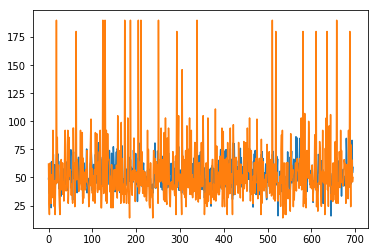

In [0]:
lineareg = LinearRegression(normalize =False)
cross = cross_val_score(lineareg, features,pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)

# x_train=map(float,x_train)
# y_train=map(float,y_train)
# x_test=map(float,x_test)
# y_test=map(float,y_test)

lineareg.fit(x_train, y_train)

pred = lineareg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)


#(500 IMAGES LESS THAN WITH THE PREVIOUS REGRESSOR !!!!! )


In [0]:
with open('/content/Linear_withITO_Shanghai.bin','wb') as file:
  pickle.dump(lineareg,file)



In [0]:
print(((-1)*cross)**0.5)

[42.30825023 25.60483796 38.67711297]


In [0]:
d=[]
for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))
  k=y_test[i]-pred[i]
  if(k>=10):
    d.append(k)


[62.]	[48.804893]
[27.]	[51.959503]
[17.]	[35.661743]
[44.]	[56.586136]
[63.]	[58.780792]
[30.]	[49.674774]
[27.]	[23.102303]
[52.33]	[64.13626]
[32.]	[36.636086]
[40.39]	[49.542015]
[92.]	[58.718155]
[63.12]	[70.594025]
[42.8]	[44.37574]
[24.17]	[29.25476]
[47.]	[61.33084]
[17.]	[33.12986]
[44.]	[54.458908]
[50.]	[44.397194]
[190.]	[65.78136]
[45.]	[72.1971]
[85.7]	[60.538635]
[48.]	[71.10864]
[56.85]	[54.719116]
[61.]	[64.36154]
[35.]	[40.012924]
[24.]	[45.606735]
[17.]	[36.440582]
[45.]	[36.55043]
[62.]	[46.212524]
[66.]	[33.45436]
[39.]	[57.42325]
[46.]	[56.407814]
[63.]	[44.53042]
[34.95]	[41.05388]
[46.27]	[57.55156]
[29.]	[40.037933]
[41.]	[47.488266]
[81.1]	[62.95086]
[92.]	[56.50058]
[79.]	[43.59687]
[38.]	[63.93297]
[40.84]	[51.248184]
[50.]	[55.511864]
[44.]	[38.618484]
[92.]	[57.10144]
[27.]	[51.772667]
[40.84]	[50.166702]
[85.7]	[61.503204]
[51.]	[62.289383]
[57.]	[47.97351]
[55.]	[68.91933]
[44.02]	[74.66347]
[34.16]	[40.37523]
[44.]	[54.68371]
[40.]	[44.26705]
[27.12]	[2

In [0]:
#plt.plot(d)
print(len(y_test))
print(len(d))

696
177


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

16.24767663388954


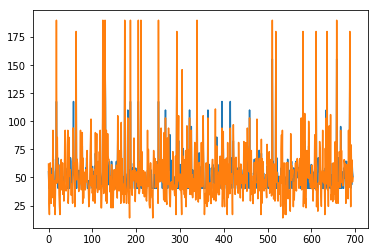

In [0]:
reg = RandomForestRegressor(max_depth=3) 
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.3, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)


In [0]:
print(((-1)*cross)**0.5)

[41.18913367 44.01512265 24.32403346]


In [0]:
#joblib.dump(reg,'Random_withITO.pkl')
with open('/content/Randon_withITO_Shanghai.bin','wb') as file:
  pickle.dump(reg, file)



In [0]:

for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))
  
  

In [0]:
def trans_deg(im):
#   im = cv2.imread(img)
#   im = cv2.resize(im, (256,256))
  B=np.zeros((256,256))
  D=np.zeros((256,256))
  C=np.zeros((256,256))
  # 3rd channel or im[2] has been split as b,g,r 

  b,g,r = cv2.split(im)

  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      D[i][j] = min(b[i][j], g[i][j], r[i][j])
      B[i][j] = max(b[i][j], g[i][j], r[i][j])
      C[i][j] = B[i][j] - D[i][j]

  d = np.sum(D)/float(np.size(D))
  b = np.sum(B)/float(np.size(B))
  c = b-d 
  A = (0.33)*max(np.ndarray.flatten(B)) + (0.66)*b
  
  x1=((A - d)/float(A)) 
  x2=(c/float(A))
  u = 10.127489
  v= -8.336512
  s = 0.13606234
  
  w = math.exp(-0.5*(u*x1 + v*x2)+s)
  
  if(w<=0.1):
      w=0
  elif(w<=0.3):
    w=1
  elif(w<=0.5):
    w=2
  elif(w<=0.7):
    w=3
  elif(w<=0.8):
    w=4
  elif(w<=0.9):
    w=5
    
  return w

In [0]:
# def transmission(img, lt = 230, retMean = False):
#   ker = np.ones((3, 3))/9.0
#   imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   b, g, r = cv2.split(img)
#   hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
#   _, _, v = cv2.split(hsv)
#   v_blur = cv2.filter2D(v, -1, ker)
#   _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
#   sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
#   sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
#   building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
#   al = max(v_blur.flatten())
#   #Airlight Found. Now calculate Transmission Map
#   img_norm = img/float(al)
#   b, g, r = cv2.split(img_norm)
#   kernel = np.ones((3,3),np.uint8)
#   im_new = np.zeros((img.shape[0], img.shape[1]))
#   for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#       im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
#   dcp = cv2.erode(im_new, kernel, iterations = 1)
#   #ax[3].imshow(im_new, cmap = 'gray')
#   #ax[4].imshow(dcp, cmap = 'gray')
#   tr = np.ones((dcp.shape[0], dcp.shape[1]))
#   for i in range(dcp.shape[0]):
#     for j in range(dcp.shape[1]):
#       tr[i][j] = 1 - dcp[i][j]
#   #ax[1].imshow(tr, cmap = 'gray')
#   if retMean == False:
#     return tr
#   elif retMean == True:
#     return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
# from sklearn.ensemble import GradientBoostingRegressor

# gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=120)

# cross = cross_val_score(gbrt, features, pm, scoring ='neg_mean_squared_error',cv=3)

# x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

# gbrt.fit(x_train, y_train)

# y_pred = gbrt.predict(x_test)

# errors = [mean_squared_error(y_val, y_pred)
# for y_pred in gbrt.staged_predict(X_val)]

# bst_n_estimators = np.argmin(errors)

# gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
# gbrt_best.fit(x_train, y_train) 


In [0]:
# print((cross*(-1))**0.5)

In [0]:
# pred = gbrt_best.predict(x_test)

# plt.plot(pred)
# plt.plot(y_test)

# print(mean_squared_error(pred, y_test)**0.5)

In [0]:
# pred = reg.predict(x_test)

# plt.plot(pred)
# plt.plot(y_test)

# print(mean_squared_error(pred, y_test)**0.5)

In [0]:
# print(((-1)*cross)**0.5)